In [74]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [ ]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func , inspect
from datetime import timedelta

In [ ]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [ ]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [53]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [86]:
# Get a list of column names and types
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [55]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [56]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [60]:
# Find the most recent date in the data set.
last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


Query Date:  2016-08-23


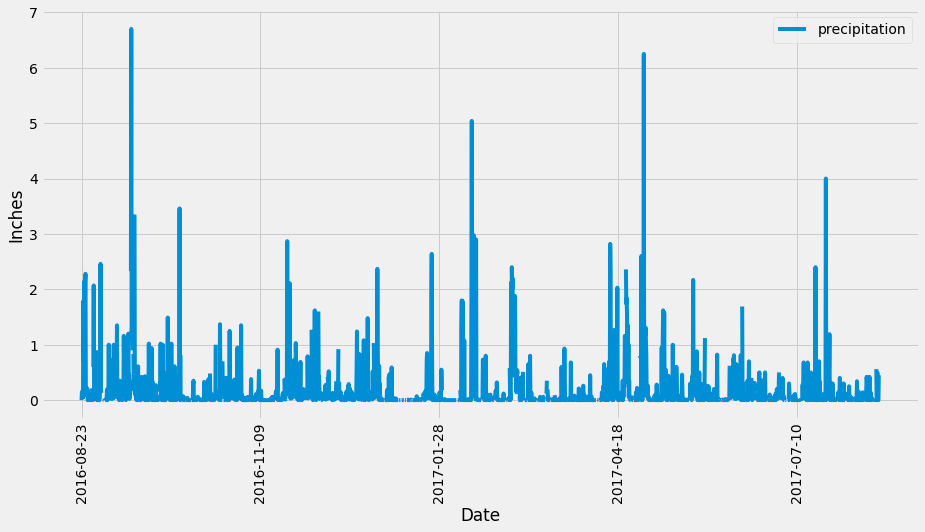

In [81]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date,Measurement.prcp]
Measurement_date= session.query(*sel).\
    filter(Measurement.date >= query_date ).\
    order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(Measurement_date, columns=['date', 'precipitation'])
df.set_index('date',inplace=True)
# Sort the dataframe by date
df = df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
ax= df.plot(rot=90,figsize=(14,7))
ax.set_ylabel('Inches')
ax.set_xlabel('Date')
plt.show()

In [82]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [85]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).first()

(9,)

In [89]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Count_station= session.query(Measurement.station,func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
Count_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [94]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').first()
highest_temp= session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').first()
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').first()
print([lowest_temp,highest_temp,average_temp])

[(54.0,), (85.0,), (71.66378066378067,)]


In [101]:
query_date

datetime.date(2016, 8, 23)

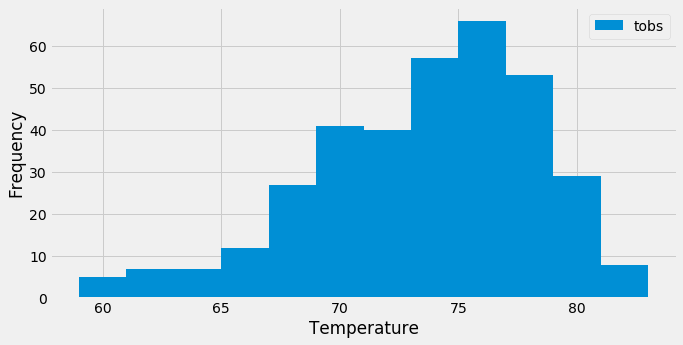

In [108]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Observation_data = session.query(Measurement.tobs) .\
                    filter(Measurement.station=='USC00519281') .\
                    filter(Measurement.date >= query_date).all()
df = pd.DataFrame(Observation_data, columns=['tobs'])
ap= df.plot.hist(bins=12, figsize=(10,5))
ap.set_xlabel('Temperature')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()